In [18]:
Submission

Proyek Akhir : Klasifikasi Gambar

Nama : Fauzan Randy Susanto

Username : rendy_hydren

Email : fauzansusanto99@sma.belajar.id

In [ ]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

In [12]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [21]:
databaseUtama = 'rockpaperscissors/rps-cv-images/'

latihDatagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.4
)

latihGenerator = latihDatagen.flow_from_directory(
    databaseUtama,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validasiGenerator = latihDatagen.flow_from_directory(
    databaseUtama,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
model.fit(train_generator, epochs=7, validation_data=validation_generator)

Epoch 1/7
42/42 [==============================] - 104s 2s/step - loss: 0.1983 - accuracy: 0.9330 - val_loss: 0.2614 - val_accuracy: 0.9005
Epoch 2/7
42/42 [==============================] - 103s 2s/step - loss: 0.1998 - accuracy: 0.9262 - val_loss: 0.1651 - val_accuracy: 0.9485
Epoch 3/7
42/42 [==============================] - 103s 2s/step - loss: 0.1686 - accuracy: 0.9437 - val_loss: 0.1883 - val_accuracy: 0.9382
Epoch 4/7
42/42 [==============================] - 101s 2s/step - loss: 0.1693 - accuracy: 0.9444 - val_loss: 0.1649 - val_accuracy: 0.9371
Epoch 5/7
42/42 [==============================] - 98s 2s/step - loss: 0.1534 - accuracy: 0.9490 - val_loss: 0.1032 - val_accuracy: 0.9691
Epoch 6/7
42/42 [==============================] - 96s 2s/step - loss: 0.1057 - accuracy: 0.9665 - val_loss: 0.1437 - val_accuracy: 0.9577
Epoch 7/7
42/42 [==============================] - 99s 2s/step - loss: 0.1285 - accuracy: 0.9589 - val_loss: 0.1083 - val_accuracy: 0.9737


In [26]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


Saving WhatsApp Image 2023-12-02 at 19.54.24.jpeg to WhatsApp Image 2023-12-02 at 19.54.24 (1).jpeg
1/1 [==============================] - 0s 113ms/step
WhatsApp Image 2023-12-02 at 19.54.24 (1).jpeg
Kertas


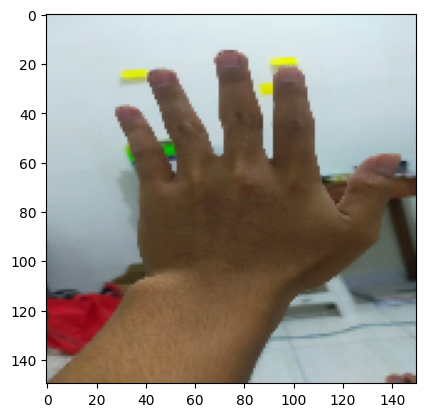

In [27]:
telahDiunggah = files.upload()

for fileDiunggah in telahDiunggah.keys():
  pathFile = fileDiunggah
  img = image.load_img(pathFile, target_size=(150,150))
  imgplot = plt.imshow(img)
  saveArayImg = image.img_to_array(img)
  saveArayImg = np.expand_dims(saveArayImg, axis=0)

  images = np.vstack([saveArayImg])
  classes = model.predict(images, batch_size=10)

  print(fileDiunggah)
  if classes[0][0]==1:
    print('Kertas')
  elif classes[0][1]==1:
    print('Batu')
  elif classes[0][2]==1:
    print('Gunting')
  else:
    print('Tidak Diketahui(Bukan batu, gunting, maupun kertas)')